# Intermediate

## Task 03: Task: Apply topic modeling to Middle High German literature

Description:

Description: Explore themes in courtly love poetry, heroic epics, or other genres. REM / REF is your friend :-)

This code explores topic distribution in Middle High German literature, examining how topics vary across genres and dialects. It utilizes Latent Dirichlet Allocation (LDA) to uncover latent themes and provides visualizations and metrics for interpretation.

Hints:

- Consider the different dialects of Middle High German.

- Use a model that can handle the unique orthographic features of the language.


**Libraries:**

* **nltk:**
    * `tokenize`: Splits text into words (tokens).
* **gensim:**
    * `corpora`: Creates a dictionary and corpus for topic modeling.
    * `models.LdaMulticore`: Implementation of LDA.
    * `models.coherencemodel`: Assesses the quality of the topics found.
* **string:**  Handles string manipulations (like removing punctuation).
* **numpy:** Performs numerical calculations.
* **matplotlib.pyplot:**  Visualizes results with a stacked bar chart.
* **collections.defaultdict:** Provides convenient dictionary-like storage.
* **re:** Provides regular expression matching operations (used for orthography adjustments).

**Code Walkthrough:**

1. **Data Loading and Preprocessing:**
   * Load Middle High German texts with metadata (title, genre, dialect).
   * Define custom stop words specific to Middle High German.
   * The `preprocess` function:
     * Tokenizes text.
     * Converts to lowercase.
     * Removes punctuation and numbers.
     * Removes stop words.
     * Standardizes spelling variations (æ/œ to ae, iu to ü).
     * Removes short tokens.
   * Group preprocessed texts by genre and dialect.

2. **Topic Modeling with LDA:**
   * Combine all preprocessed texts.
   * Create a dictionary mapping words to IDs.
   * Build a corpus representing each text as word frequencies.
   * Train the LDA model to find `num_topics` (set to 5) within the corpus.
   * Calculate the average topic distribution for each genre and dialect.

3. **Visualization and Results:**
   * Generate a stacked bar chart showing topic proportions for each genre.
   * Print the top words associated with each topic.
   * Calculate and print the topic coherence score to assess topic quality.
   * Print the most dominant topic for each dialect along with its proportion.

**Key Points and Refinements:**

* **Custom Stop Words:** Tailored for Middle High German for better topic extraction.
* **Orthography Handling:** Addresses spelling variations common in Middle High German texts.
* **Genre and Dialect Analysis:**  The code provides insights into how topics are distributed not only across genres but also across different dialects.

**Additional Notes:**

* The provided sample data is placeholder; you'll need to replace it with your actual corpus of Middle High German literature.
* Consider increasing the `num_topics` parameter for a more nuanced analysis or exploring other visualization techniques to gain deeper insights into the topic distributions.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


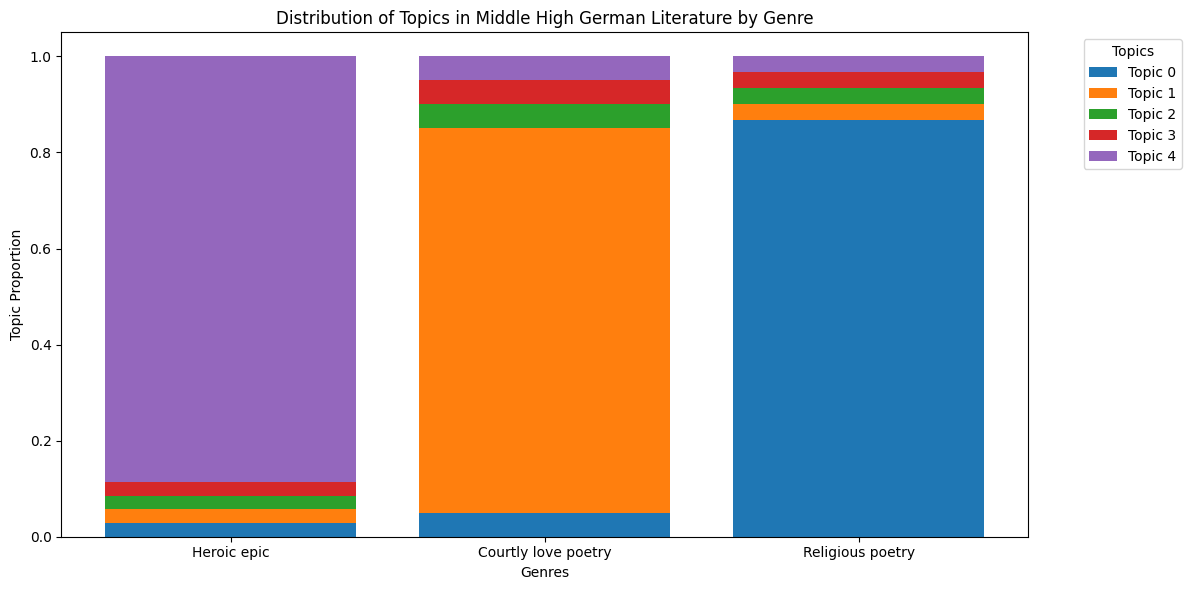

Top words for each topic:
Topic: 0 
Words: 0.154*"erlôst" + 0.154*"got" + 0.154*"man" + 0.153*"hât" + 0.153*"werden" + 0.026*"sumer" + 0.026*"was" + 0.026*"komen" + 0.026*"alten" + 0.026*"vil"

Topic: 1 
Words: 0.206*"komen" + 0.206*"sumer" + 0.206*"was" + 0.035*"werden" + 0.035*"hât" + 0.035*"man" + 0.035*"maeren" + 0.035*"geseit" + 0.035*"alten" + 0.035*"vil"

Topic: 2 
Words: 0.072*"was" + 0.072*"sumer" + 0.072*"komen" + 0.072*"werden" + 0.071*"hât" + 0.071*"got" + 0.071*"man" + 0.071*"wunders" + 0.071*"vil" + 0.071*"erlôst"

Topic: 3 
Words: 0.072*"sumer" + 0.072*"was" + 0.072*"komen" + 0.072*"hât" + 0.071*"wunders" + 0.071*"werden" + 0.071*"uns" + 0.071*"erlôst" + 0.071*"got" + 0.071*"vil"

Topic: 4 
Words: 0.136*"geseit" + 0.136*"uns" + 0.136*"maeren" + 0.136*"vil" + 0.136*"alten" + 0.136*"wunders" + 0.023*"was" + 0.023*"sumer" + 0.023*"komen" + 0.023*"werden"

Topic Coherence: 0.29516034082116444

Top topics by dialect:
East Franconian: Topic 4 (Proportion: 0.89)
Bavarian: Topic

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Download necessary NLTK data
nltk.download('punkt')

# YOU SHOULD USE AN EXTERNAL DATASET AND PREPROCESSING IN A SIMILAR WAY INSTED OF THE DUMMY DATA
texts = [
    ("Uns ist in alten mæren wunders vil geseit", "Nibelungenlied", "Heroic epic", "East Franconian"),
    ("Dô der sumer komen was", "Walther von der Vogelweide", "Courtly love poetry", "Bavarian"),
    ("Got hât den werden man erlôst", "Wolfram von Eschenbach", "Religious poetry", "Bavarian"),

]

# Custom stopwords for Middle High German
custom_stopwords = set(['der', 'diu', 'daz', 'die', 'den', 'dem', 'des', 'ein', 'eine', 'eines', 'und', 'ist'])

# Preprocessing function
def preprocess(text):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove punctuation and numbers
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]

    # Remove stopwords
    tokens = [token for token in tokens if token not in custom_stopwords]

    # Handle Middle High German orthography
    tokens = [re.sub(r'[æœ]', 'ae', token) for token in tokens]
    tokens = [re.sub(r'iu', 'ü', token) for token in tokens]

    # Remove short tokens (likely to be abbreviations or OCR errors)
    tokens = [token for token in tokens if len(token) > 2]

    return tokens

# Preprocess all texts and group by genre
texts_by_genre = defaultdict(list)
for text, _, genre, _ in texts:
    processed_text = preprocess(text)
    texts_by_genre[genre].append(processed_text)

# Create dictionary and corpus
all_texts = [text for genre_texts in texts_by_genre.values() for text in genre_texts]
dictionary = corpora.Dictionary(all_texts)
corpus = [dictionary.doc2bow(text) for text in all_texts]

# Train LDA model
num_topics = 5
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Function to get average topic distribution for a genre
def get_avg_topic_dist(texts):
    genre_corpus = [dictionary.doc2bow(text) for text in texts]
    topic_dists = [dict(lda_model.get_document_topics(doc)) for doc in genre_corpus]
    avg_dist = {i: np.mean([dist.get(i, 0) for dist in topic_dists]) for i in range(num_topics)}
    return avg_dist

# Get average topic distributions for each genre
genre_distributions = {genre: get_avg_topic_dist(texts) for genre, texts in texts_by_genre.items()}

# Prepare data for visualization
topics = range(num_topics)
genres = list(genre_distributions.keys())
topic_scores = [[genre_distributions[genre][topic] for genre in genres] for topic in topics]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(genres))

for topic, scores in enumerate(topic_scores):
    ax.bar(genres, scores, bottom=bottom, label=f'Topic {topic}')
    bottom += scores

ax.set_xlabel('Genres')
ax.set_ylabel('Topic Proportion')
ax.set_title('Distribution of Topics in Middle High German Literature by Genre')
ax.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print top words for each topic
print("Top words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Calculate topic coherence
coherence_model = gensim.models.CoherenceModel(model=lda_model, texts=all_texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print(f"Topic Coherence: {coherence}")

# Analyze topics by dialect
texts_by_dialect = defaultdict(list)
for text, _, _, dialect in texts:
    processed_text = preprocess(text)
    texts_by_dialect[dialect].append(processed_text)

dialect_distributions = {dialect: get_avg_topic_dist(texts) for dialect, texts in texts_by_dialect.items()}

# Print top topics for each dialect
print("\nTop topics by dialect:")
for dialect, dist in dialect_distributions.items():
    top_topic = max(dist, key=dist.get)
    print(f"{dialect}: Topic {top_topic} (Proportion: {dist[top_topic]:.2f})")

## Solution

1. YOU SHOULD IMPLEMET A REFERENCE CORPUS WHICH HAS SIMILAR METADATA